In [1]:
from matplotlib import pyplot as plt
import pandas as np
import random
import numpy as np
import time

In [2]:
nodes = []
random.random()
main_nodes = dict()

main_node_connected_to_central = dict()
connected_main_nodes = []
main_nodes = dict()
nodes_hash = dict()
# main_node = dict()
xs = [x[0] for x in nodes]
ys = [y[1] for y in nodes]
edge_list_per_cluster = dict()
central_node = (0, 0)
edges_between_nodes_in_different_clusters = []
k = 5
i = 0
p = 1
spaceSize = 100
bounds_xs = np.linspace(-spaceSize, spaceSize, k)
bounds_ys = np.linspace(-spaceSize, spaceSize, k)
bounds_xs
cluster_positions = dict()

In [3]:
def euclid(t1, t2):
    import math
    return math.sqrt((t1[0] - t2[0])**2 + (t1[1] - t2[1])**2)

In [4]:
def inSameCluster(t1, t2, bounds_xs, i, bounds_ys, j, k):
    try:
        if t1[0] >= bounds_xs[i] and t2[0] >= bounds_xs[i] and t1[0] < bounds_xs[i +1]and t2[0] < bounds_xs[i+1] : 
            if t1[1] >= bounds_ys[j] and t2[1] >= bounds_ys[j] and t1[1] < bounds_ys[j+1] and t2[1] < bounds_ys[j+1]:
                return True
        return False
    except:
        return True

In [5]:
def draw_main_nodes(main_nodes : dict):
    for node in main_nodes.values():
        plt.scatter([node[0]], [node[1]], color = "red", s = 100)

In [6]:
def number_of_main_nodes_not_connected_to_central(main_nodes):
    counter = 0 
    for node in main_nodes.values():
        if main_node_connected_to_central[node] == False:
            counter +=1
            
    return counter > 0 

In [7]:
def draw_edges_for_current_cluster(list_edge):
    for edge in list_edge:
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color = "green", lw = 0.5)
        plt.scatter([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color = "red")        

In [8]:
def draw_edges(edge_list):
    for key in edge_list.keys():
#         print(edge_list[i])
#         i = edge_list[j]
        
        draw_edges_for_current_cluster(edge_list[key])
#         plt.plot([i[0][0], i[1][0]], [i[1][0], i[1][1]])

In [9]:
def draw_graph():
    for i_0 in range(len(bounds_xs)):
        for j_0 in range(len(bounds_ys)):
            plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
            plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



In [10]:
def connect_main_nodes(main_nodes : dict):
    for node in main_nodes.values():
        neighbour = find_closest_neighbour(node, main_nodes.values())
        connected_main_nodes.append((node, neighbour))
    return connected_main_nodes

In [11]:
# for x in connect_main_nodes(main_nodes):
#     if x[1] != None:
#         plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])

In [12]:
def init_main_nodes_connected_to_central():
    for node in main_nodes.values():
        main_node_connected_to_central[node] = False
    

In [13]:
def find_closest_node_to_central(main_nodes):
    max_dist = float('inf')
    closest_node = None
    for node in main_nodes.values():
        if euclid(node, central_node) < max_dist and main_node_connected_to_central[node] == False:
            max_dist = euclid(node, central_node)
            closest_node = node
    
    return closest_node

In [14]:
def flag_main_nodes_as_true_recursively():
    pass

In [15]:
(1,2) not in [(1,3),(2,3)]

True

In [16]:
def find_closest_neighbour(current_node, other_nodes):
    min_dist = float('inf')
    closest = None
    for tmp_node in other_nodes:
        if current_node != tmp_node and ((tmp_node, current_node) not in connected_main_nodes) and ((current_node, tmp_node) not in connected_main_nodes):
            if euclid(current_node, tmp_node) < min_dist:
                min_dist = euclid(current_node, tmp_node)
                closest = tmp_node
    return closest

In [17]:
def find_max_node(hash_map_of_nodes : dict):
    return sorted(hash_map_of_nodes, key = lambda x: hash_map_of_nodes[x], reverse = True)[0]

In [18]:
def make_unique_list_from_tuples(list_of_tuples):
    unique = []
    for x in list_of_tuples:
        unique.append(x[0])
        unique.append(x[1])
#     print(unique)
#     print([unique.count(x) for x in unique])
    return(unique)

In [19]:
def count_for_every_node_in_cluster(unique_list):
    hash_map = dict()
    for x in unique_list:
        hash_map[x] = unique_list.count(x)
#     print(hash_map)
    return hash_map

In [20]:
def recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes):
    for pair_of_nodes in connected_main_nodes:
        if (closest_node == pair_of_nodes[0] and main_node_connected_to_central[pair_of_nodes[1]] == False) or (closest_node == pair_of_nodes[1] and main_node_connected_to_central[pair_of_nodes[0]] == False):
            # print("chaning_hash map for {}".format(pair_of_nodes))
            if closest_node == pair_of_nodes[0]:
                main_node_connected_to_central[pair_of_nodes[1]] = True
                recursively_set_other_nodes_as_connected_to_central(pair_of_nodes[1], main_node_connected_to_central, connected_main_nodes)
            else:
                main_node_connected_to_central[pair_of_nodes[0]] = True
                recursively_set_other_nodes_as_connected_to_central(pair_of_nodes[0], main_node_connected_to_central, connected_main_nodes)
                


In [21]:
def calculateNumOfEdges():
    counter = 0
    for cluster in edge_list_per_cluster.keys():
        counter += len(edge_list_per_cluster[cluster])
    return counter

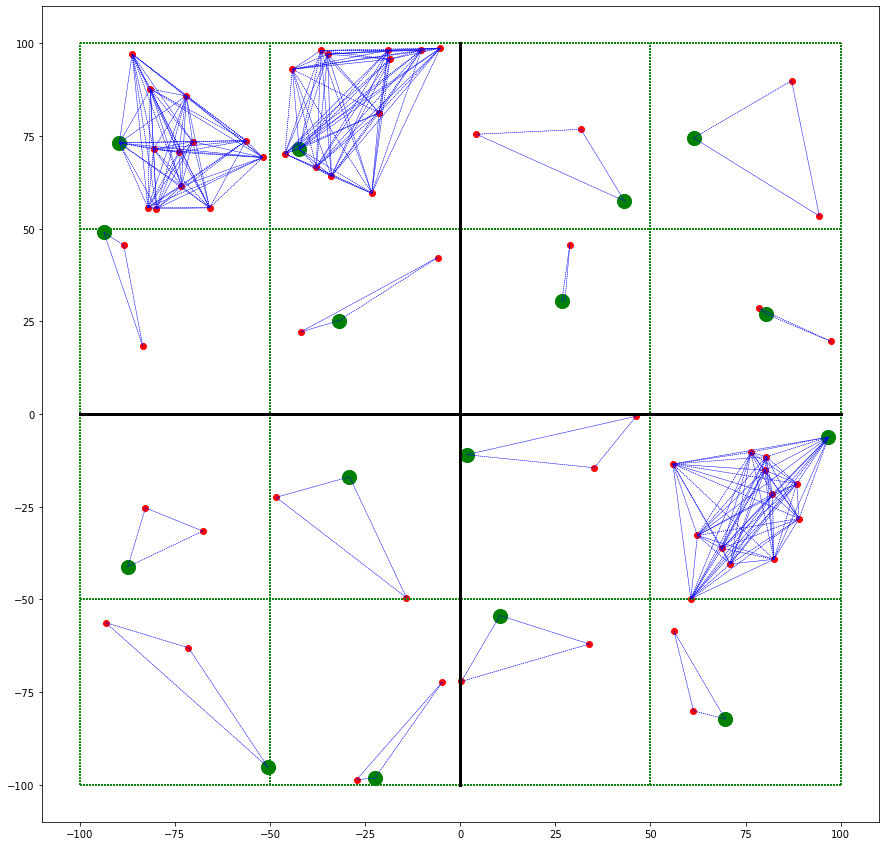

In [22]:
p = 0.8
plt.figure(figsize=(15, 15))
for i_0 in range(len(bounds_xs)):
    for j_0 in range(len(bounds_ys)):
        plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
        plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1,len(bounds_ys)):
        # plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min_ys - 2, max_ys +2], color ="green", dashes = [1])
        # plt.plot([min_xs - 2, max_xs + 2], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])
        cluster_positions["cluster_{}_{}".format(i_0, j_0)] = ((bounds_xs[i_0-1], bounds_xs[i_0]), (bounds_ys[j_0-1], bounds_ys[j_0]))
        list_of_nodes_in_current_cluster = []
        for _ in range(3):
            node = (random.uniform(bounds_xs[i_0-1], bounds_xs[i_0]), random.uniform(bounds_ys[j_0-1], bounds_ys[j_0]))
            plt.scatter([node[0]],[node[1]], color = "red")
            list_of_nodes_in_current_cluster.append(node)
        if random.random() > 0.7:
            for _ in range(10):
                node = (random.uniform(bounds_xs[i_0-1], bounds_xs[i_0]), random.uniform(bounds_ys[j_0-1], bounds_ys[j_0]))
                plt.scatter([node[0]],[node[1]], color = "red")
                list_of_nodes_in_current_cluster.append(node)
        nodes_hash["cluster_{}_{}".format(i_0, j_0)] = list_of_nodes_in_current_cluster
        edges_for_current_cluster = []
        for i in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
            for j in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
                if i != j: 
#                     if random.random() > p:
                        plt.plot([nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][0], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][0]], [nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][1], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][1]], color ="blue", lw = 0.5, dashes = [2])
                        edges_for_current_cluster.append((nodes_hash["cluster_{}_{}".format(i_0, j_0)][i], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j]))
        if len(edges_for_current_cluster) > 0:
            max_node = find_max_node(count_for_every_node_in_cluster(make_unique_list_from_tuples(edges_for_current_cluster)))
            plt.scatter([max_node[0]], [max_node[1]], color = "green", s = 200)
            main_nodes["cluster_{}_{}".format(i_0, j_0)] = max_node
        
        for checkNode in list_of_nodes_in_current_cluster:
            if checkNode != max_node:
                if ((max_node, checkNode) not in edges_for_current_cluster) and ((checkNode, max_node) not in edges_for_current_cluster):
                    plt.plot([max_node[0], checkNode[0]], [max_node[1], checkNode[1]], color = "red", dashes = [2])
                    edges_for_current_cluster.append((max_node, checkNode))
        edge_list_per_cluster["cluster_{}_{}".format(i_0, j_0)] = edges_for_current_cluster


#random povezivanje fakulteta sa razlicitih univerziteta
for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1, len(bounds_ys)):
        for _ in range(3):
            node = random.randint(0,len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) - 1) 
            random_cluster_i = random.randint(1, len(bounds_xs) - 1) 
            random_cluster_j = random.randint(1, len(bounds_ys) - 1)
            picked_node = nodes_hash["cluster_{}_{}".format(i_0, j_0)][node]
            for i_node in nodes_hash["cluster_{}_{}".format(random_cluster_i, random_cluster_j)]:
                if random.random() > 0.5 and (i_node,picked_node) not in edges_between_nodes_in_different_clusters:
    #                 print(i_node)
                    picked_node = nodes_hash["cluster_{}_{}".format(i_0, j_0)][node]
#                     plt.plot([picked_node[0], i_node[0]], [picked_node[1], i_node[1]], color = "red", lw=0.5, dashes = [3])
                    edges_between_nodes_in_different_clusters.append((i_node, picked_node))
        
plt.plot(bounds_ys,[0 for _ in range(len(bounds_ys))], color = "black", lw=3)
plt.plot([0 for _ in range(len(bounds_xs))], bounds_xs, color = "black", lw = 3)
plt.savefig("rezultati/pocetna_{}.png".format(str(time.localtime()[3]) + "_" + str(time.localtime()[4]) + "_" + str(time.localtime()[5])))

In [23]:
[1,2,3] + [4,5,6] == [1,2,3,4,5,6]

True

In [24]:
# plt.figure(figsize=(10, 10))

# draw_graph()
# draw_edges(edge_list_per_cluster)

In [25]:
def delete_cluster(cluster):
    main_nodes.pop(cluster)
#     edge_list_per_cluster[cluster].clear()
    edge_list_per_cluster.pop(cluster)
#     nodes_hash[cluster].clear()
    nodes_hash.pop(cluster)

In [26]:
main_nodes

{'cluster_1_1': (-50.478284269766995, -95.30184902282592),
 'cluster_1_2': (-87.38108659218375, -41.19428125051594),
 'cluster_1_3': (-93.6569303120911, 49.029339717215905),
 'cluster_1_4': (-89.59607348716482, 73.17566399773797),
 'cluster_2_1': (-22.449772360517038, -98.24482384256378),
 'cluster_2_2': (-29.09932669315606, -16.904635649508734),
 'cluster_2_3': (-31.82837062662007, 25.244085042058323),
 'cluster_2_4': (-42.31117065568881, 71.48580470045022),
 'cluster_3_1': (10.456030404505912, -54.36579692328077),
 'cluster_3_2': (1.6774396006928927, -10.95549917356437),
 'cluster_3_3': (26.70197648609649, 30.45894580990776),
 'cluster_3_4': (43.18368033648651, 57.508724312025976),
 'cluster_4_1': (69.67270292385025, -82.26395009452688),
 'cluster_4_2': (96.80272800707652, -6.184157892406432),
 'cluster_4_3': (80.2605646653483, 27.09068254696177),
 'cluster_4_4': (61.36924277004947, 74.52430594071107)}

In [27]:
def generate_new_edges(new_cluster_name, nodes_hash, cluster_i, cluster_j):
#     edge_list_per_cluster[new_cluster_name] = []
    new_list = []
    for i in range(len(nodes_hash[new_cluster_name])):
        for j in range(len(nodes_hash[new_cluster_name])):
            if (nodes_hash[new_cluster_name][i], nodes_hash[new_cluster_name][j]) not in edge_list_per_cluster: 
#                 print("proslo " + str((nodes_hash[new_cluster_name][i], nodes_hash[new_cluster_name][j])))
                new_list.append((nodes_hash[new_cluster_name][i], nodes_hash[new_cluster_name][j]))
                plt.plot([nodes_hash[new_cluster_name][i][0], nodes_hash[new_cluster_name][j][0]],[nodes_hash[new_cluster_name][i][1], nodes_hash[new_cluster_name][j][1]], color = "red", dashes = [1])
    return new_list

In [28]:
# def split_cluster(cluster_i):
print(cluster_positions)

{'cluster_1_1': ((-100.0, -50.0), (-100.0, -50.0)), 'cluster_1_2': ((-100.0, -50.0), (-50.0, 0.0)), 'cluster_1_3': ((-100.0, -50.0), (0.0, 50.0)), 'cluster_1_4': ((-100.0, -50.0), (50.0, 100.0)), 'cluster_2_1': ((-50.0, 0.0), (-100.0, -50.0)), 'cluster_2_2': ((-50.0, 0.0), (-50.0, 0.0)), 'cluster_2_3': ((-50.0, 0.0), (0.0, 50.0)), 'cluster_2_4': ((-50.0, 0.0), (50.0, 100.0)), 'cluster_3_1': ((0.0, 50.0), (-100.0, -50.0)), 'cluster_3_2': ((0.0, 50.0), (-50.0, 0.0)), 'cluster_3_3': ((0.0, 50.0), (0.0, 50.0)), 'cluster_3_4': ((0.0, 50.0), (50.0, 100.0)), 'cluster_4_1': ((50.0, 100.0), (-100.0, -50.0)), 'cluster_4_2': ((50.0, 100.0), (-50.0, 0.0)), 'cluster_4_3': ((50.0, 100.0), (0.0, 50.0)), 'cluster_4_4': ((50.0, 100.0), (50.0, 100.0))}


In [29]:
1 in range(0,1)

False

In [30]:
mapa = {1 : "a", 2 : "b"}
mapa.pop(1)
mapa

{2: 'b'}

In [31]:
1 < 2 < 3

True

In [32]:
def split_cluster(cluster_i):
    cluster_bounds_xs = cluster_positions[cluster_i][0]
    cluster_bounds_ys = cluster_positions[cluster_i][1]
#     print(cluster_bounds_xs, cluster_bounds_ys)
    sub_xs = np.linspace(cluster_bounds_xs[0], cluster_bounds_xs[1], 3)
    sub_ys = np.linspace(cluster_bounds_ys[0], cluster_bounds_ys[1], 3)    
    print(sub_xs, sub_ys)
    for i in range(len(sub_xs)):
        for j in range(len(sub_ys)):
            new_nodes = []
            new_edges = []
            for first_node in nodes_hash[cluster_i]:
                for second_node in nodes_hash[cluster_i]:
                    if first_node != second_node:
                        if sub_xs[i] <= first_node[0] <= sub_xs[i+1] and sub_ys[j] <= first_node[1] <= sub_ys[j+1] and sub_xs[i] <= second_node[0] <= sub_xs[i+1] and sub_ys[j] <= second_node[1] <= sub_ys[j+1]:       
#                             print(str(first_node) + " and " + str(second_node))
                            if (first_node, second_node) not in new_edges and (second_node, first_node) not in new_edges:
                                new_nodes.append(first_node)
                                new_nodes.append(second_node)
                                new_edges.append((first_node, second_node))
            if len(new_nodes) > 0:
                nodes_hash["splited_cluster_{}_{}_{}".format(cluster_i, i, j)] = new_nodes
                edge_list_per_cluster["splited_cluster_{}_{}_{}".format(cluster_i, i, j)] = new_edges
                max_node = find_max_node(count_for_every_node_in_cluster(make_unique_list_from_tuples(new_edges)))
                main_nodes["splited_cluster_{}_{}_{}".format(cluster_i, i, j)] = max_node
                
                try:
                    main_nodes.pop(cluster_i)
                    edge_list_per_cluster.pop(cluster_i)
                except:
                    pass
#                                 nodes_hash["splited_cluster_{}_{}_{}".format(cluster_i, i, j)].append(first_node)
#                                 nodes_hash["splited_cluster_{}_{}_{}".format(cluster_i, i, j)].append(second_node)
#                                 edge_list_per_cluster["splited_cluster_{}_{}_{}".format(cluster_i, i, j)].append((first_node, second_node))

In [33]:
nodes_hash

{'cluster_1_1': [(-50.478284269766995, -95.30184902282592),
  (-93.17515624170116, -56.264005696064764),
  (-71.43661271581017, -63.0471378938177)],
 'cluster_1_2': [(-87.38108659218375, -41.19428125051594),
  (-82.73198216065747, -25.3040485153816),
  (-67.66295399336596, -31.564158129709526)],
 'cluster_1_3': [(-93.6569303120911, 49.029339717215905),
  (-88.45145818634283, 45.60373873384273),
  (-83.46348463699854, 18.45151727887765)],
 'cluster_1_4': [(-89.59607348716482, 73.17566399773797),
  (-72.03101818244284, 85.84006956412952),
  (-81.44848873067481, 87.7259275027945),
  (-79.83675897163384, 55.399696278471936),
  (-65.8917809993707, 55.66087177757195),
  (-56.269710665189564, 73.79268665844398),
  (-73.26629112414993, 61.54299657798646),
  (-51.90254183349512, 69.23461231100654),
  (-82.0949204286043, 55.725059717166005),
  (-86.22282013318474, 97.15290078095936),
  (-80.5928474516569, 71.47317865462607),
  (-70.36258642052158, 73.54519648684922),
  (-73.99679681305605, 70.64

In [34]:
edge_list_per_cluster

{'cluster_1_1': [((-50.478284269766995, -95.30184902282592),
   (-93.17515624170116, -56.264005696064764)),
  ((-50.478284269766995, -95.30184902282592),
   (-71.43661271581017, -63.0471378938177)),
  ((-93.17515624170116, -56.264005696064764),
   (-50.478284269766995, -95.30184902282592)),
  ((-93.17515624170116, -56.264005696064764),
   (-71.43661271581017, -63.0471378938177)),
  ((-71.43661271581017, -63.0471378938177),
   (-50.478284269766995, -95.30184902282592)),
  ((-71.43661271581017, -63.0471378938177),
   (-93.17515624170116, -56.264005696064764))],
 'cluster_1_2': [((-87.38108659218375, -41.19428125051594),
   (-82.73198216065747, -25.3040485153816)),
  ((-87.38108659218375, -41.19428125051594),
   (-67.66295399336596, -31.564158129709526)),
  ((-82.73198216065747, -25.3040485153816),
   (-87.38108659218375, -41.19428125051594)),
  ((-82.73198216065747, -25.3040485153816),
   (-67.66295399336596, -31.564158129709526)),
  ((-67.66295399336596, -31.564158129709526),
   (-87.38

[-100.  -75.  -50.] [ 50.  75. 100.]
[-50. -25.   0.] [ 50.  75. 100.]
[ 50.  75. 100.] [-50. -25.   0.]


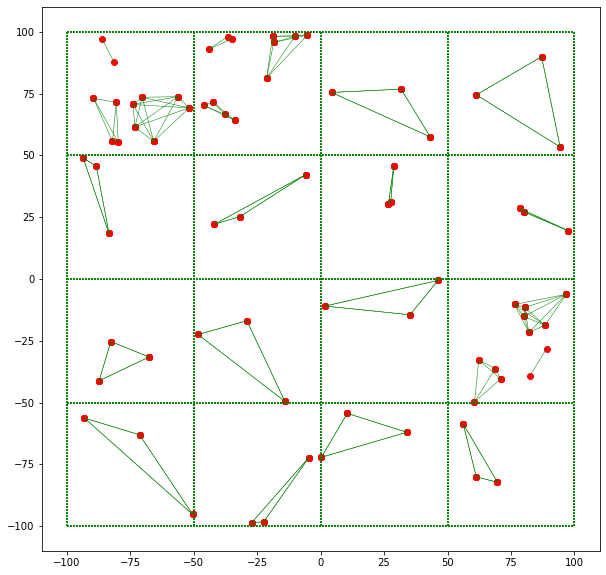

In [35]:
plt.figure(figsize=(10, 10))
for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1,len(bounds_ys)):
        if len(edge_list_per_cluster["cluster_{}_{}".format(i_0, j_0)]) > 10:
            split_cluster("cluster_{}_{}".format(i_0, j_0))
draw_graph()
draw_edges(edge_list_per_cluster)

In [36]:
def merge_two_clusters(cluster_i, cluster_j):
    if cluster_i in nodes_hash.keys() and cluster_j in nodes_hash.keys():
        print("merging " + cluster_i + " " + cluster_j)
        nodes_hash["merged_{}_{}".format(cluster_i, cluster_j)] = nodes_hash[cluster_i] + nodes_hash[cluster_j]
        print("Da li je isto? " + str(nodes_hash["merged_{}_{}".format(cluster_i, cluster_j)] == nodes_hash[cluster_i] + nodes_hash[cluster_j]))
    #     print("len is " + str(len(nodes_hash["merged_{}_{}".format(cluster_i, cluster_j)])))
    #     edge_list_per_cluster["merged_{}_{}".format(cluster_i, cluster_j)] = [(1,2)]
        edge_list_per_cluster["merged_{}_{}".format(cluster_i, cluster_j)] = generate_new_edges("merged_{}_{}".format(cluster_i, cluster_j),nodes_hash, cluster_i, cluster_j)
    #     print(generate_new_edges("merged_{}_{}".format(cluster_i, cluster_j),nodes_hash, cluster_i, cluster_j))
        edges_for_current_cluster = edge_list_per_cluster["merged_{}_{}".format(cluster_i, cluster_j)] 
        max_node = find_max_node(count_for_every_node_in_cluster(make_unique_list_from_tuples(edges_for_current_cluster)))
        main_nodes["merged_{}_{}".format(cluster_i, cluster_j)] = max_node

        delete_cluster(cluster_i)
        delete_cluster(cluster_j)

In [37]:
def merge_clusters():
    min_nodes = 12
    num_of_merged = 0
    # za svaki klaster proveri da li postoji uslov da se spoji sa susedima, ukoliko oba imaju manje cvorova od min_nodes
    for i_0 in range(1,len(bounds_xs)):
        for j_0 in range(1,len(bounds_ys)):
            try:
                if len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) < min_nodes and len(nodes_hash["cluster_{}_{}".format(i_0, j_0-1)]) < min_nodes:
                    print("ispunjneo")
                    merge_two_clusters("cluster_{}_{}".format(i_0, j_0), "cluster_{}_{}".format(i_0, j_0-1))
                    num_of_merged +=1
                    
                elif len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) < min_nodes and len(nodes_hash["cluster_{}_{}".format(i_0, j_0+1)]) < min_nodes:
                    print("ispunjneo")
                    num_of_merged +=1

                    merge_two_clusters("cluster_{}_{}".format(i_0, j_0), "cluster_{}_{}".format(i_0, j_0+1))
                elif len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) < min_nodes and len(nodes_hash["cluster_{}_{}".format(i_0-1, j_0)]) < min_nodes:
                    print("ispunjneo")
                    num_of_merged +=1

                    merge_two_clusters("cluster_{}_{}".format(i_0, j_0), "cluster_{}_{}".format(i_0-1, j_0))
                elif len(nodes_hash["cluster_{}_{}".format(i_0, j_0)]) < min_nodes and len(nodes_hash["cluster_{}_{}".format(i_0+1, j_0)]) < min_nodes:
                    print("ispunjneo")
                    num_of_merged +=1

                    merge_two_clusters("cluster_{}_{}".format(i_0, j_0), "cluster_{}_{}".format(i_0+1, j_0))
            except:
                pass
    return num_of_merged
         

ispunjneo
merging cluster_1_2 cluster_1_1
Da li je isto? True
ispunjneo
merging cluster_2_2 cluster_2_1
Da li je isto? True
ispunjneo
merging cluster_3_2 cluster_3_1
Da li je isto? True
ispunjneo
merging cluster_3_4 cluster_3_3
Da li je isto? True
ispunjneo
merging cluster_4_3 cluster_4_4
Da li je isto? True


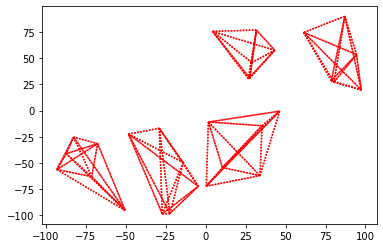

In [38]:
while True:
    if merge_clusters() == 0:
        break

In [39]:
nodes_hash

{'cluster_1_3': [(-93.6569303120911, 49.029339717215905),
  (-88.45145818634283, 45.60373873384273),
  (-83.46348463699854, 18.45151727887765)],
 'cluster_1_4': [(-89.59607348716482, 73.17566399773797),
  (-72.03101818244284, 85.84006956412952),
  (-81.44848873067481, 87.7259275027945),
  (-79.83675897163384, 55.399696278471936),
  (-65.8917809993707, 55.66087177757195),
  (-56.269710665189564, 73.79268665844398),
  (-73.26629112414993, 61.54299657798646),
  (-51.90254183349512, 69.23461231100654),
  (-82.0949204286043, 55.725059717166005),
  (-86.22282013318474, 97.15290078095936),
  (-80.5928474516569, 71.47317865462607),
  (-70.36258642052158, 73.54519648684922),
  (-73.99679681305605, 70.64153129159337)],
 'cluster_2_3': [(-31.82837062662007, 25.244085042058323),
  (-5.922036117495573, 42.24782888504096),
  (-41.87314152591509, 22.17825701368511)],
 'cluster_2_4': [(-42.31117065568881, 71.48580470045022),
  (-21.338688078562672, 81.30606831408723),
  (-5.214336660267861, 98.7476886

In [40]:
main_nodes

{'cluster_1_3': (-93.6569303120911, 49.029339717215905),
 'cluster_2_3': (-31.82837062662007, 25.244085042058323),
 'cluster_4_1': (69.67270292385025, -82.26395009452688),
 'splited_cluster_cluster_1_4_0_0': (-89.59607348716482, 73.17566399773797),
 'splited_cluster_cluster_1_4_0_1': (-81.44848873067481, 87.7259275027945),
 'splited_cluster_cluster_1_4_1_0': (-65.8917809993707, 55.66087177757195),
 'splited_cluster_cluster_2_4_0_0': (-42.31117065568881, 71.48580470045022),
 'splited_cluster_cluster_2_4_0_1': (-44.11063973206973, 93.02905295850204),
 'splited_cluster_cluster_2_4_1_1': (-21.338688078562672, 81.30606831408723),
 'splited_cluster_cluster_4_2_0_0': (60.61988715680176, -49.82195602869213),
 'splited_cluster_cluster_4_2_1_0': (89.06320979454367, -28.175436643705513),
 'splited_cluster_cluster_4_2_1_1': (96.80272800707652, -6.184157892406432),
 'merged_cluster_1_2_cluster_1_1': (-87.38108659218375, -41.19428125051594),
 'merged_cluster_2_2_cluster_2_1': (-29.09932669315606, -1

In [41]:
# plt.figure(figsize=(10, 10))

# draw_graph()
# draw_edges(edge_list_per_cluster)

In [42]:
nodes_hash

{'cluster_1_3': [(-93.6569303120911, 49.029339717215905),
  (-88.45145818634283, 45.60373873384273),
  (-83.46348463699854, 18.45151727887765)],
 'cluster_1_4': [(-89.59607348716482, 73.17566399773797),
  (-72.03101818244284, 85.84006956412952),
  (-81.44848873067481, 87.7259275027945),
  (-79.83675897163384, 55.399696278471936),
  (-65.8917809993707, 55.66087177757195),
  (-56.269710665189564, 73.79268665844398),
  (-73.26629112414993, 61.54299657798646),
  (-51.90254183349512, 69.23461231100654),
  (-82.0949204286043, 55.725059717166005),
  (-86.22282013318474, 97.15290078095936),
  (-80.5928474516569, 71.47317865462607),
  (-70.36258642052158, 73.54519648684922),
  (-73.99679681305605, 70.64153129159337)],
 'cluster_2_3': [(-31.82837062662007, 25.244085042058323),
  (-5.922036117495573, 42.24782888504096),
  (-41.87314152591509, 22.17825701368511)],
 'cluster_2_4': [(-42.31117065568881, 71.48580470045022),
  (-21.338688078562672, 81.30606831408723),
  (-5.214336660267861, 98.7476886

In [43]:
init_size = calculateNumOfEdges()  + len(edges_between_nodes_in_different_clusters)
print("Init size " + str(init_size))

Init size 386


In [44]:
main_node_connected_to_central

{}

In [45]:
def fix_disconnected_main_nodes(connected_main_nodes, main_node_connected_to_central):
    pass

In [46]:
(1, _) in [(2,2), (2,3)]

False

In [47]:
def node_connected_to_main_in_cluster(main_node, edge):
    # print(list(edge))
    if main_node == edge[0] or main_node == edge[1]:
        return True
    else:
        return False

In [48]:
def checkIfBothConnectedToMainNode(main_node, first_edge, second_edge):
    return node_connected_to_main_in_cluster(main_node, first_edge) and node_connected_to_main_in_cluster(main_node, second_edge)

In [49]:
def findNotMainNode(main_node,edge):
    if main_node == edge[0]:
        return edge[1]
    else:
        return edge[0]

In [50]:
def removeEdgeBetweenTwoNodes(main_node,first_edge, second_edge, edges : list):
    first_node = findNotMainNode(main_node,first_edge)
    second_node = findNotMainNode(main_node,second_edge)
    plt.plot([first_node[0], second_node[0]], [first_node[1], second_node[1]], color = "red", lw = 0.2, dashes = [1])
    if (first_node, second_node) in edges:
        edges.remove((first_node, second_node))
    elif (second_node, first_node) in edges:
        edges.remove((second_node,first_node))
        

In [51]:
def process_current_cluster(main_node, edges):
    for i in range(len(edges)):
        for j in range(len(edges)):
            if j != i and i < len(edges) and j < len(edges):
                if checkIfBothConnectedToMainNode(main_node, edges[i], edges[j]):
                    plt.plot([edges[i][0][0], edges[i][1][0]], [edges[i][0][1], edges[i][1][1]], color="yellow", lw = 3)
                    plt.plot([edges[j][0][0], edges[j][1][0]], [edges[j][0][1], edges[j][1][1]], color="yellow", lw = 3)
                    removeEdgeBetweenTwoNodes(main_node, edges[i], edges[j], edges)
                    # plt.show()

In [52]:
def delete_unnecessary_edges_in_clusters(main_nodes, edge_list_per_cluster):
    for cluster in edge_list_per_cluster.keys():
        if len(edge_list_per_cluster[cluster]) > 0:
            process_current_cluster(main_nodes[cluster], edge_list_per_cluster[cluster])
        # plt.show()

In [53]:
for i in range(len([1,2,3])):
    print(i)

0
1
2


In [54]:
# edge_list_per_cluster["cluster_1_2"]

In [55]:
def add_new_edge(cluster, main_node, node):
    edge_list_per_cluster[cluster].append((main_node, node))

In [56]:
main_nodes

{'cluster_1_3': (-93.6569303120911, 49.029339717215905),
 'cluster_2_3': (-31.82837062662007, 25.244085042058323),
 'cluster_4_1': (69.67270292385025, -82.26395009452688),
 'splited_cluster_cluster_1_4_0_0': (-89.59607348716482, 73.17566399773797),
 'splited_cluster_cluster_1_4_0_1': (-81.44848873067481, 87.7259275027945),
 'splited_cluster_cluster_1_4_1_0': (-65.8917809993707, 55.66087177757195),
 'splited_cluster_cluster_2_4_0_0': (-42.31117065568881, 71.48580470045022),
 'splited_cluster_cluster_2_4_0_1': (-44.11063973206973, 93.02905295850204),
 'splited_cluster_cluster_2_4_1_1': (-21.338688078562672, 81.30606831408723),
 'splited_cluster_cluster_4_2_0_0': (60.61988715680176, -49.82195602869213),
 'splited_cluster_cluster_4_2_1_0': (89.06320979454367, -28.175436643705513),
 'splited_cluster_cluster_4_2_1_1': (96.80272800707652, -6.184157892406432),
 'merged_cluster_1_2_cluster_1_1': (-87.38108659218375, -41.19428125051594),
 'merged_cluster_2_2_cluster_2_1': (-29.09932669315606, -1

Size of edges before deleting unnecessary edges in same cluster 261
Size of edges before deleting unnecessary edges in same cluster 169


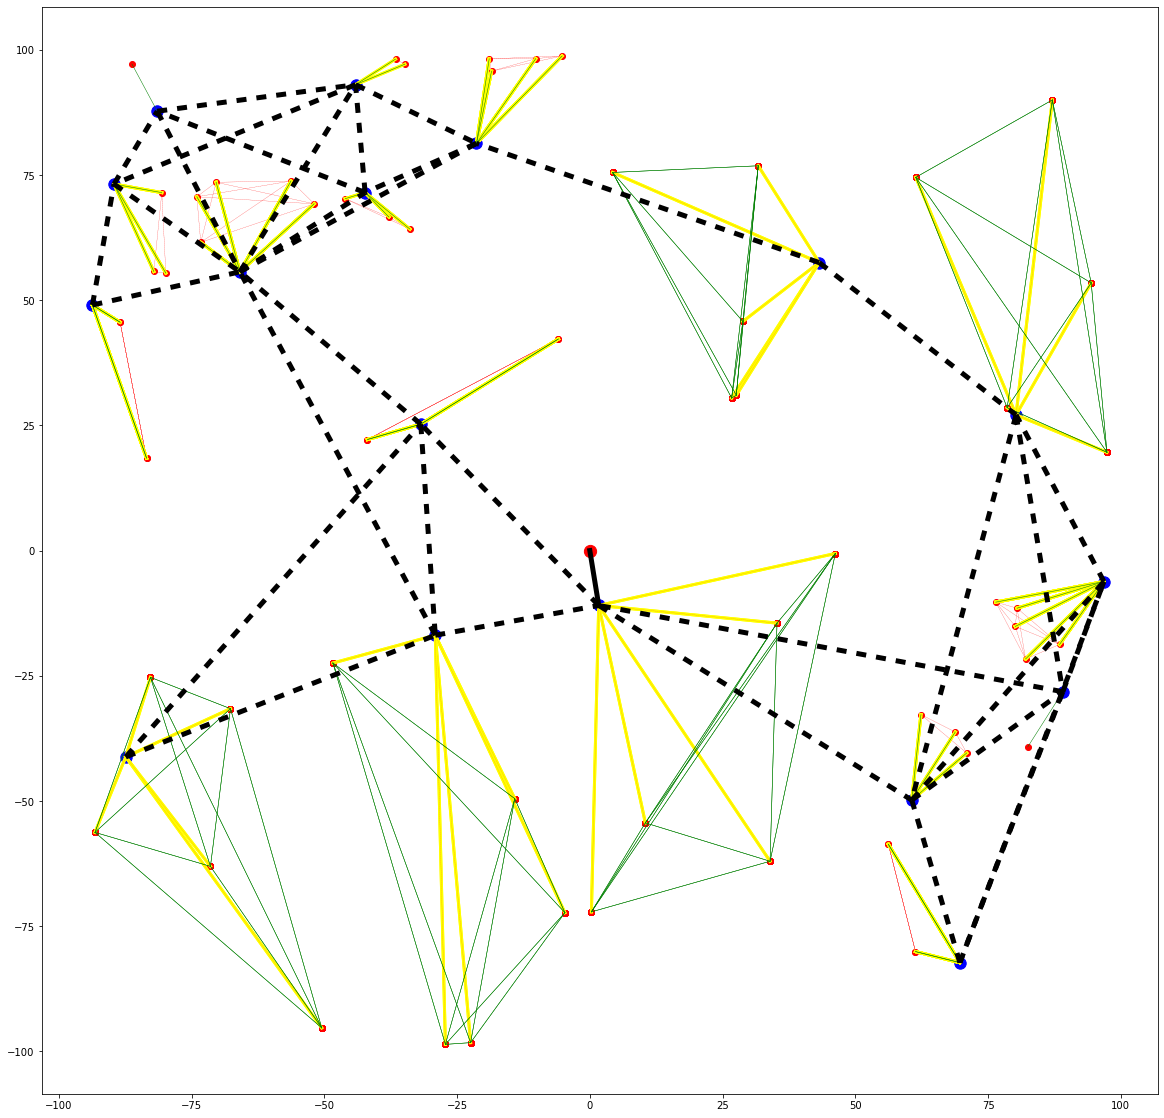

In [57]:
init_main_nodes_connected_to_central()

# delete_cluster("cluster_1_1")
plt.figure(figsize = (20, 20))
before = calculateNumOfEdges()
print("Size of edges before deleting unnecessary edges in same cluster " + str(calculateNumOfEdges()))
delete_unnecessary_edges_in_clusters(main_nodes, edge_list_per_cluster)
draw_edges(edge_list_per_cluster)
after = calculateNumOfEdges()
print("Size of edges before deleting unnecessary edges in same cluster " + str(calculateNumOfEdges()))

draw_main_nodes(main_nodes)
closest_node = find_closest_node_to_central(main_nodes)
main_node_connected_to_central[closest_node] = True
connected_main_nodes = []   
connect_main_nodes(main_nodes)
connect_main_nodes(main_nodes)
recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes)

#edges that has been deleted
plt.scatter([central_node[0]], [central_node[1]], color = "red", s = 150)
# plt.scatter([neigbour[0]], [neigbour[1]], color = "green", s = 130)

for x in connected_main_nodes:
#     if x[1] != None:
        plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]], lw = 5, color = "black", dashes = [2])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])


for x in main_node_connected_to_central.keys():
    if main_node_connected_to_central[x] == True:
        plt.scatter([x[0]], [x[1]], color = "blue", s = 130)
        
fix_disconnected_main_nodes(connected_main_nodes, main_node_connected_to_central)

plt.plot([central_node[0], closest_node[0]], [central_node[1], closest_node[1]], lw = 5, color = "black")
plt.savefig("rezultati/slika_{}.png".format(str(time.localtime()[3]) + "_" + str(time.localtime()[4]) + "_" + str(time.localtime()[5])))

In [58]:
str(time.localtime()[3]) + "_" + str(time.localtime()[4]) + "_" + str(time.localtime()[5]) 

'16_4_15'

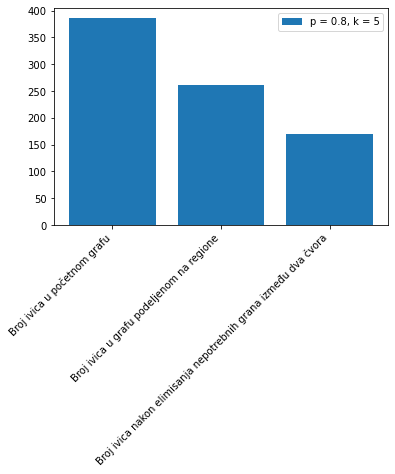

In [59]:
plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [init_size,before,after])
plt.legend(["p = {}, k = {}".format(p, k)])
plt.xticks(rotation=45, ha='right')
plt.savefig("rezultati/bar_{}.jpg".format(str(time.localtime()[3]) + "_" + str(time.localtime()[4]) + "_" + str(time.localtime()[5])))

In [60]:
# # plt.figure(figsize=(15, 15))
# plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [1686,1440,288])
# plt.xticks(rotation=45, ha='right')
# plt.legend(["p = 1, k = 5"])
# plt.savefig("rezultati/bar 1")

In [61]:
# plt.bar(["Broj ivica u početnom grafu", "Broj ivica u grafu podeljenom na regione", "Broj ivica nakon elimisanja nepotrebnih grana između dva čvora"], [8518,7290,1458])
# plt.xticks(rotation=45, ha='right')
# plt.legend(["p = 1, k = 10"])
# plt.savefig("rezultati/bar 2")

In [62]:
nodes_hash

{'cluster_1_3': [(-93.6569303120911, 49.029339717215905),
  (-88.45145818634283, 45.60373873384273),
  (-83.46348463699854, 18.45151727887765)],
 'cluster_1_4': [(-89.59607348716482, 73.17566399773797),
  (-72.03101818244284, 85.84006956412952),
  (-81.44848873067481, 87.7259275027945),
  (-79.83675897163384, 55.399696278471936),
  (-65.8917809993707, 55.66087177757195),
  (-56.269710665189564, 73.79268665844398),
  (-73.26629112414993, 61.54299657798646),
  (-51.90254183349512, 69.23461231100654),
  (-82.0949204286043, 55.725059717166005),
  (-86.22282013318474, 97.15290078095936),
  (-80.5928474516569, 71.47317865462607),
  (-70.36258642052158, 73.54519648684922),
  (-73.99679681305605, 70.64153129159337)],
 'cluster_2_3': [(-31.82837062662007, 25.244085042058323),
  (-5.922036117495573, 42.24782888504096),
  (-41.87314152591509, 22.17825701368511)],
 'cluster_2_4': [(-42.31117065568881, 71.48580470045022),
  (-21.338688078562672, 81.30606831408723),
  (-5.214336660267861, 98.7476886